Text(0, 0.5, '$e^{-u} = \\left<\\rho\\right>/\\rho_c$')

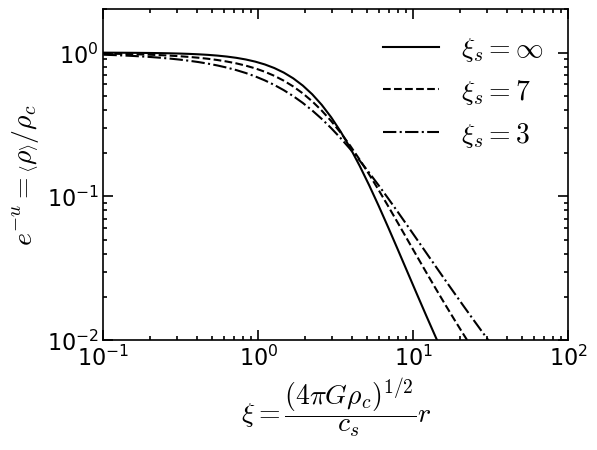

In [1]:
from tesphere import tes
r = np.logspace(-1, 2)
lines, labels = [], []
linestyles = ['-', '--', '-.']
for ls, rs in zip(linestyles, [np.infty, 7, 3]):
    ts = tes.TES(rsonic = rs)
    ln, = plt.loglog(r, ts.density(r), c='k', ls=ls, lw=1.5)
    lines.append(ln)
    labels.append(r'$\xi_s = {}$'.format(rs))
labels[0] = r'$\xi_s = \infty$'
plt.xlim(1e-1, 1e2)
plt.ylim(1e-2, 2e0)
plt.legend(lines, labels, loc='upper right')
plt.xlabel(r'$\xi = \dfrac{(4\pi G \rho_c)^{1/2}}{c_s}r$')
plt.ylabel(r'$e^{-u} = \left<\rho\right>/\rho_c$')

(0.1, 100.0)

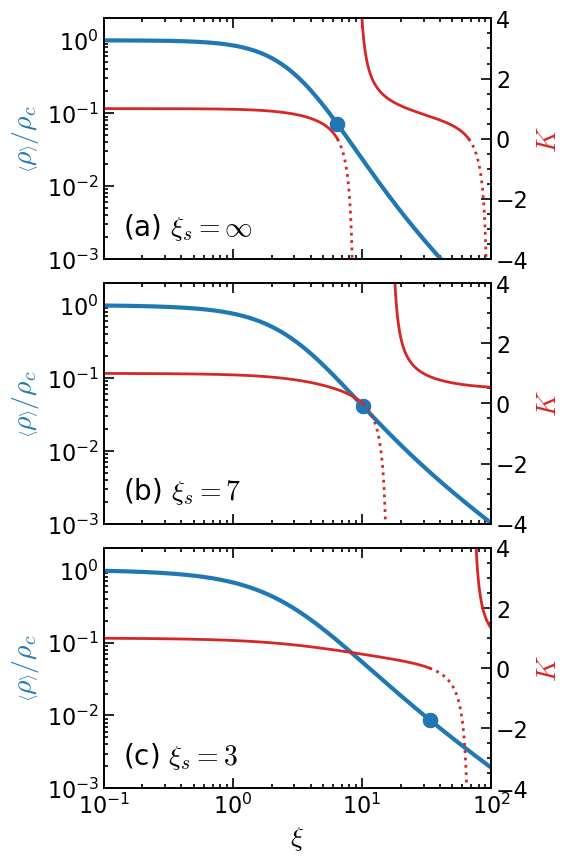

In [2]:
from tesphere import tes

fig, axs = plt.subplots(3, 1, figsize=(5,10), sharex='col', gridspec_kw=dict(hspace=0.1))
panels = ['(a)', '(b)', '(c)']
for panel, ax, xi_s in zip(panels, axs.flat, [np.infty, 7, 3]):
    ts = tes.TES(pindex=0.5, rsonic=xi_s)
    r = np.logspace(-1, 2, 4096)
    dcrit = np.exp(-ts.ucrit)
  
    plt.sca(ax)
    plt.loglog(r, ts.density(r), lw=3, c='tab:blue')
    plt.plot([ts.rcrit, ts.rcrit], [dcrit, dcrit], marker=MarkerStyle('o', fillstyle='full'),
             ms=10, c='tab:blue')
    plt.ylabel(r'$\left<\rho\right>/\rho_c$', c='tab:blue')
    plt.ylim(1e-3, 2e0)
    
    plt.twinx()
    kappa = ts.bulk_modulus(r)
    mask = kappa < 0
    idx0 = 0
    while True:
        try:
            idxl = idx0 + np.where(kappa[idx0:] < 0)[0][0]
            idxu = idxl + np.where(kappa[idxl:] > 0)[0][0] - 1
            plt.semilogx(r[idx0:idxl], kappa[idx0:idxl], c='tab:red', lw=2, ls='-')
        except IndexError:
            plt.semilogx(r[idx0:], kappa[idx0:], c='tab:red', lw=2, ls='-')
            break
        plt.semilogx(r[idxl:idxu], kappa[idxl:idxu], c='tab:red', lw=2, ls=':')
        idx0 = idxu + 1
    plt.ylim(-4, 4)
    plt.ylabel(r'$K$', c='tab:red')
    if xi_s == np.infty:
        txt = r'$\xi_s = \infty$'
    else:
        txt = r'$\xi_s = {}$'.format(xi_s)
    plt.text(0.05, 0.1, '{} '.format(panel)+txt, transform=ax.transAxes)

plt.sca(axs[2])
plt.xlabel(r'$\xi$')
plt.xlim(1e-1, 1e2)

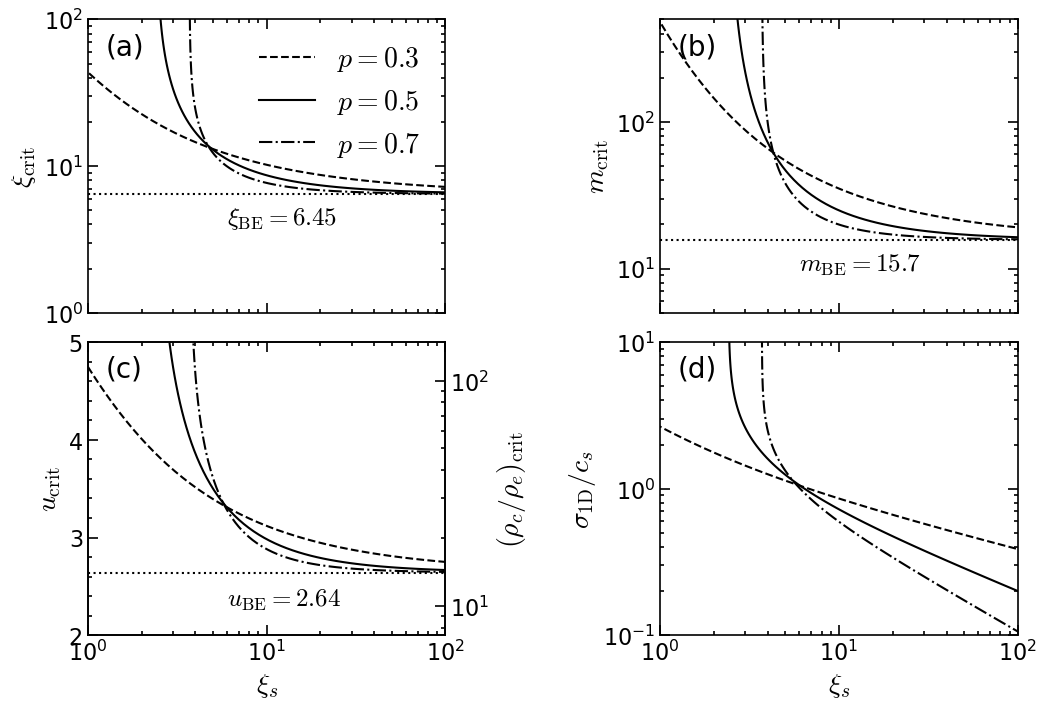

In [9]:
from tesphere import tes

ts = tes.TES()
rbe = ts.rcrit
mbe = ts.mcrit
ube = ts.ucrit

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, gridspec_kw=dict(hspace=0.1, wspace=0.6))
ax1 = axs[1,0].twinx()

linestyles = ['--', '-', '-.']
lw=1.5
ms=4
c='k'

for ls, pindex in zip(linestyles, [0.3, 0.5, 0.7]):
    with open(f"/home/sm69/tesphere/data/tsc.p{pindex}.p", "rb") as handle:
        res = pickle.load(handle)

    for ax, y in zip(axs.flat, [res['rcrit'], res['mcrit'], res['ucrit'], res['sigma']]):
        ax.plot(res['rsonic'], y, c=c, ls=ls, lw=lw, label=r'$p={}$'.format(pindex))

plt.sca(axs[0,0])
plt.axhline(rbe, ls=':', c='k', lw=lw)
plt.text(6, 4, r"$\xi_\mathrm{BE} = $"+r'${:.2f}$'.format(rbe), fontsize=18)
plt.yscale('log')
plt.ylim(1e0, 1e2)
plt.ylabel(r'$\xi_\mathrm{crit}$')
plt.legend(loc='upper right')

plt.sca(axs[0,1])    
plt.axhline(mbe, ls=':', c='k', lw=lw)
plt.text(6, 9.6, r"$m_\mathrm{BE} = $"+r'${:.1f}$'.format(mbe), fontsize=18)
plt.yscale('log')
plt.ylim(5e0, 5e2)
plt.ylabel(r'$m_\mathrm{crit}$')


plt.sca(axs[1,0])    
plt.axhline(ube, ls=':', c='k', lw=lw)
plt.text(6, 2.3, r"$u_\mathrm{BE} = $"+f'${ube:.2f}$', fontsize=18)
plt.ylim(2, 5)
plt.yticks([2, 3, 4, 5])
plt.xlabel(r'$\xi_s$')
plt.ylabel(r'$u_\mathrm{crit}$')

plt.sca(ax1)
plt.ylim(np.exp(2), np.exp(5))
plt.yscale('log')
plt.ylabel(r'$(\rho_c/\rho_e)_\mathrm{crit}$')

plt.sca(axs[1,1])
plt.xlim(1e0, 1e2)
plt.ylim(1e-1, 1e1)
plt.yscale('log')
plt.xlabel(r'$\xi_s$')
plt.ylabel(r'$\sigma_\mathrm{1D}/c_s$')

for ax, txt in zip(axs.flat, ['(a)', '(b)', '(c)', '(d)']):
    ax.set_xscale('log')
    ax.text(0.05, 0.88, txt, transform=ax.transAxes)

BE radius = 1.82 R_G


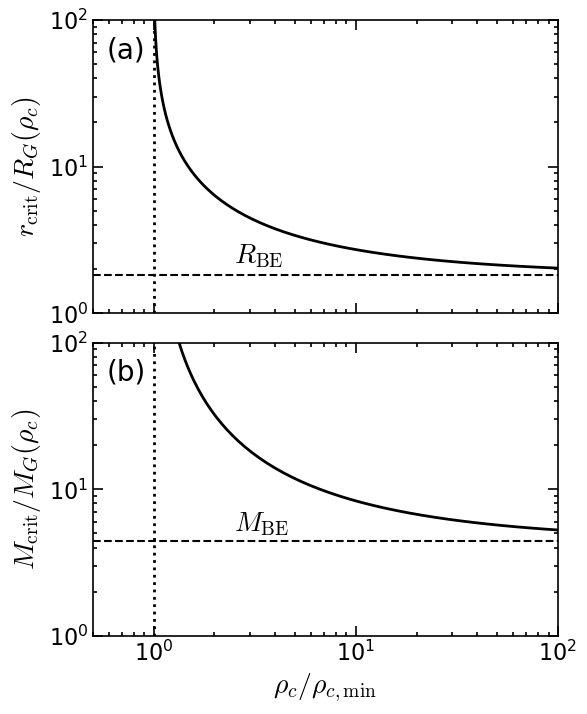

In [1]:
from turb_sphere import tes

pindex = 0.5
with open(f"/home/sm69/turbulent_equilibrium_sphere/data/tsc.p{pindex}.p", "rb") as handle:
    res = pickle.load(handle)

rs_min = tes.TES.minimum_sonic_radius(pindex)
rs = res['rsonic']
rhoc_over_rhomin = (rs/rs_min)**2
rG = np.sqrt(4*np.pi)
MG = np.sqrt(4*np.pi)

ts = tes.TES()
rbe = ts.rcrit
print(f"BE radius = {ts.rcrit / rG:.2f} R_G")

fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True, gridspec_kw=dict(hspace=0.1))

plt.sca(axs[0])

plt.loglog(rhoc_over_rhomin, res['rcrit']/rG, c='k')
plt.axhline(1.82, ls='--', c='k', lw=1.5)
plt.text(2.5, 2.2e0, r'$R_\mathrm{BE}$')
plt.axvline(1e0, ls=':', c='k')
plt.ylim(1e0, 1e2)
plt.ylabel(r'$r_\mathrm{crit}/R_G(\rho_c)$')

plt.sca(axs[1])
plt.loglog(rhoc_over_rhomin, res['mcrit']/MG, c='k')

plt.axhline(4.43, ls='--', c='k', lw=1.5)
plt.text(2.5, 5.2e0, r'$M_\mathrm{BE}$')
plt.axvline(1e0, ls=':', c='k')
plt.xlim(5e-1, 1e2)
plt.ylim(1e0, 1e2)
plt.xlabel(r'$\rho_c/\rho_{c,\mathrm{min}}$')
plt.ylabel(r'$M_\mathrm{crit}/M_G(\rho_c)$')

for ax, txt in zip(axs, ['(a)', '(b)']):
    ax.text(0.03, 0.87, txt, transform=ax.transAxes)

Text(0.03, 0.9, '(d)')

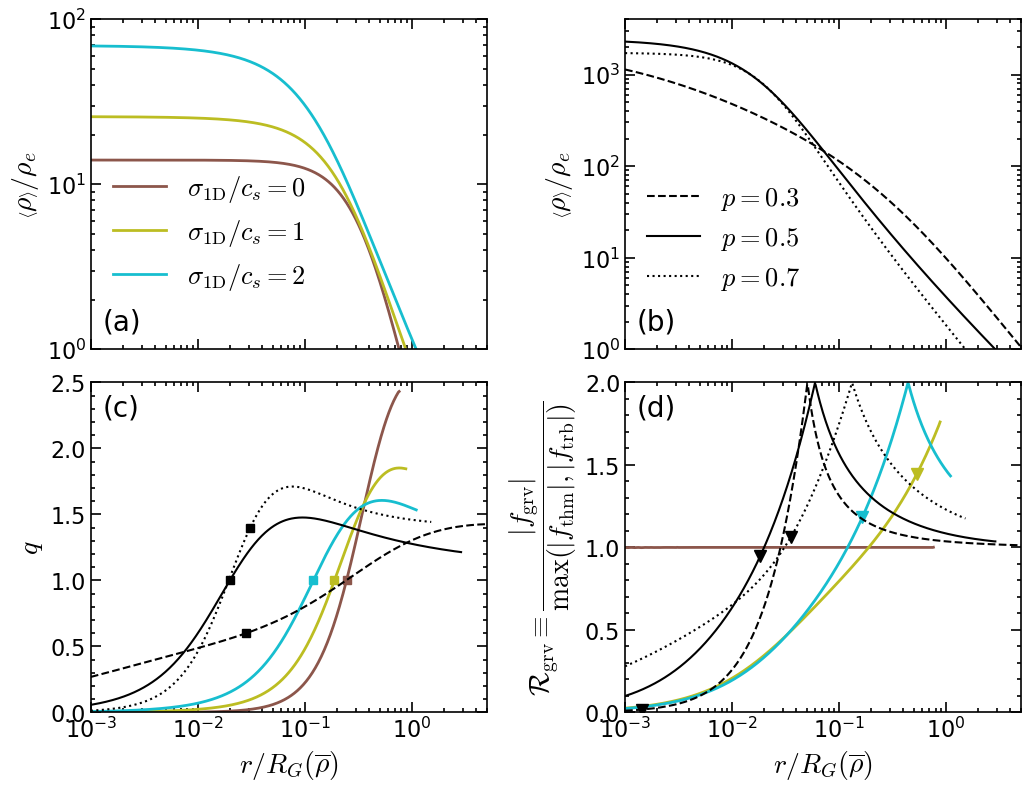

In [4]:
from tesphere import tes

p1 = dict(pindex=0.5, sigma=0,  c='tab:brown', ls='-',  lw=2  )
p2 = dict(pindex=0.5, sigma=1,  c='tab:olive', ls='-',  lw=2  )
p3 = dict(pindex=0.5, sigma=2,  c='tab:cyan',  ls='-',  lw=2  )
p4 = dict(pindex=0.3, sigma=10, c='k',         ls='--', lw=1.5)
p5 = dict(pindex=0.5, sigma=10, c='k',         ls='-',  lw=1.5)
p6 = dict(pindex=0.7, sigma=10, c='k',         ls=':',  lw=1.5)
props = [p1, p2, p3, p4, p5, p6]

for pr in props:
    pr['rsonic'] = tes.TES.find_sonic_radius(pindex=pr['pindex'], sigma_target=pr['sigma'])

fig, axs = plt.subplots(2, 2, figsize=(12, 9), sharex=True, gridspec_kw=dict(hspace=0.1, wspace=0.35))

for pr in props:
    ts = tes.TES(pindex=pr['pindex'], rsonic=pr['rsonic'])
    rhoavg = ts.mcrit/(ts.rcrit**3/3)
    rg = np.sqrt(4*np.pi)*rhoavg**-0.5
    r = np.logspace(np.log10(1e-3*rg), np.log10(ts.rcrit), 512)
    rho = ts.density(r)
    rhoe = ts.density(ts.rcrit)
    krho = -np.gradient(np.log(rho), np.log(r))
    menc = ts.enclosed_mass(r)
    dv2 = ts.velocity_dispersion(r)**2
    fthm = -1 / rho * np.gradient(rho, r, edge_order=2)
    ftrb = -1 / rho * np.gradient(rho*dv2, r, edge_order=2)
    fgrv = -menc / r**2
    frat = np.abs(fgrv) / (np.abs(fthm) + np.abs(ftrb))
    if pr['sigma'] == 10:
        ax = axs[0,1]
        lbl = r'$p = {}$'.format(pr['pindex'])
    else:
        ax = axs[0,0]
        lbl = r'$\sigma_\mathrm{1D}/c_s = $'+r'${}$'.format(pr['sigma'])
    ax.loglog(r/rg, rho/rhoe, c=pr['c'], ls=pr['ls'], lw=pr['lw'], label=lbl)

    # density slope
    plt.sca(axs[1,0])
    plt.semilogx(r/rg, krho, c=pr['c'], ls=pr['ls'], lw=pr['lw'])
    r0 = brentq(lambda x: interp1d(r, krho)(x) - 2*pr['pindex'], r[0], r[-1])
    plt.plot(r0/rg, interp1d(r, krho)(r0), marker=MarkerStyle('s', fillstyle='full'), color=pr['c'])

    # Force ratio
    plt.sca(axs[1,1])
    frat = np.abs(fgrv) / np.max([fthm, np.abs(ftrb)], axis=0)
    plt.semilogx(r/rg, frat, c=pr['c'], ls=pr['ls'], lw=pr['lw'])
    if not np.isinf(pr['rsonic']):
        plt.plot(pr['rsonic']/rg, interp1d(r, frat)(pr['rsonic']), ms=8,
                 marker=MarkerStyle('v', fillstyle='full'), color=pr['c'])


plt.sca(axs[0,0])
plt.ylim(1e0, 1e2)
plt.legend(fontsize=19, loc=(0.03, 0.14))
plt.ylabel(r'$\left<\rho\right>/\rho_e$')
plt.text(0.03, 0.06, '(a)', transform=plt.gca().transAxes)

plt.sca(axs[0,1])
plt.ylim(1e0, 4e3)
plt.legend(fontsize=19, loc=(0.03, 0.14))
plt.ylabel(r'$\left<\rho\right>/\rho_e$')
plt.text(0.03, 0.06, '(b)', transform=plt.gca().transAxes)


plt.sca(axs[1,0])
plt.ylim(0, 2.5)
plt.xlabel(r'$r/R_G(\overline{\rho})$')
plt.ylabel(r'$q$')
plt.text(0.03, 0.9, '(c)', transform=plt.gca().transAxes)

plt.sca(axs[1,1])
plt.xlim(1e-3, 5e0)
plt.ylim(0, 2)
plt.yticks(np.arange(0, 2.1, 0.5));
plt.xlabel(r'$r/R_G(\overline{\rho})$')
plt.ylabel(r'$\mathcal{R}_\mathrm{grv} \equiv \dfrac{|f_\mathrm{grv}|}{\max(|f_\mathrm{thm}|, |f_\mathrm{trb}|)}$')
plt.text(0.03, 0.9, '(d)', transform=plt.gca().transAxes)

sigma = 1, A = 0.33717542293648
sigma = 1, rs = 6.420812433405908
sigma = 2, A = 0.2348302564193233
sigma = 2, rs = 3.420401852516444


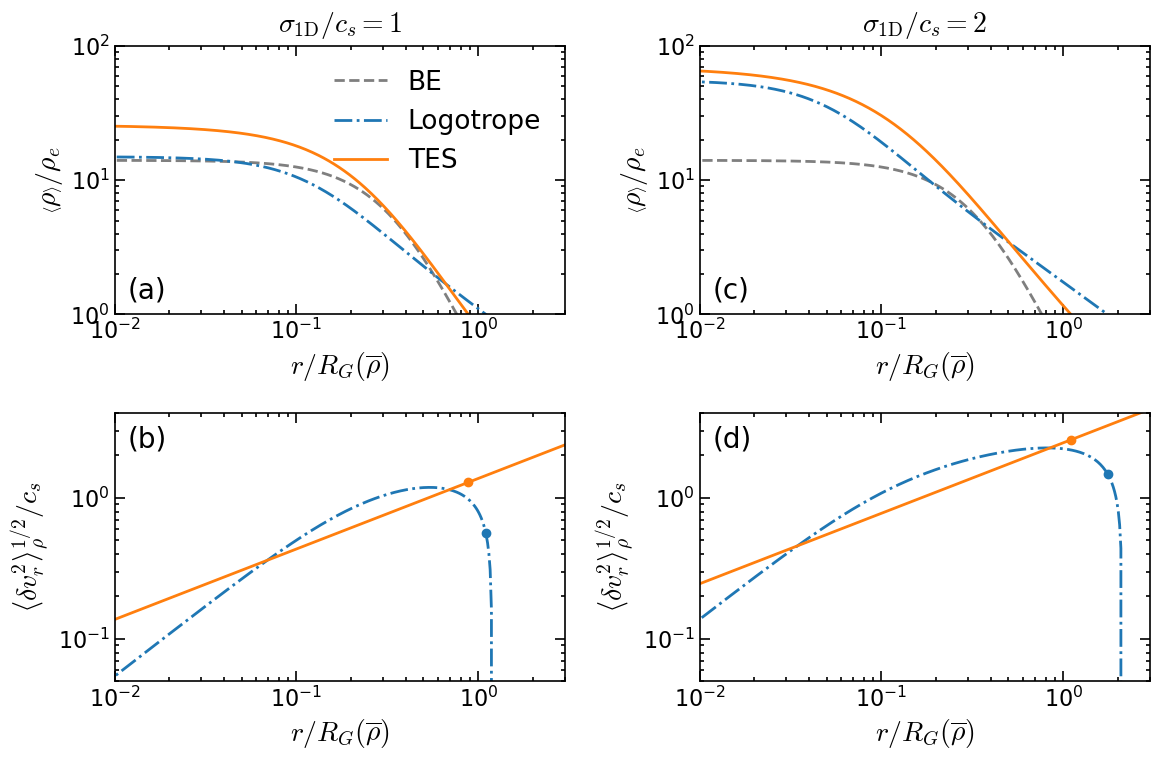

In [5]:
from tesphere import tes

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# TES
ts = tes.TES()
r = np.logspace(np.log10(ts.rcrit/1e3), np.log10(ts.rcrit), 512)
rho = ts.density(r)
rho_e = ts.density(ts.rcrit)
rhoavg = 3*ts.mcrit / ts.rcrit**3
rG = np.sqrt(4*np.pi)/np.sqrt(rhoavg)
for ax in [axs[0,0], axs[0,1]]:
    ax.loglog(r/rG, rho/rho_e, c='tab:gray', label='BE', ls='--')

for ax, sigma in zip(axs.T, [1, 2]):
    # Logotrope
    amp = tes.Logotrope.find_amplitude(sigma)
    ts = tes.Logotrope(amp)
    print(f"sigma = {sigma}, A = {ts.amp}")
    r = np.logspace(np.log10(ts.rcrit/1e3), np.log10(4*ts.rcrit), 512)
    rho = ts.density(r)
    rho_e = ts.density(ts.rcrit)
    sig = ts.velocity_dispersion(r)
    rhoavg = ts.mcrit / (3*ts.rcrit**3)
    rG = np.sqrt(4*np.pi)/3/np.sqrt(rhoavg)
    ax[0].loglog(r/rG, rho/rho_e, c='tab:blue', label='Logotrope', ls='-.')
    ax[1].loglog(r/rG, sig, c='tab:blue', ls='-.')
    ax[1].plot(ts.rcrit / rG, ts.velocity_dispersion(ts.rcrit),
               marker=MarkerStyle('o', fillstyle='full'), c='tab:blue')

    # TES
    rs = tes.TES.find_sonic_radius(pindex=0.5, sigma_target=sigma)
    ts = tes.TES(pindex=0.5, rsonic=rs)
    print(f"sigma = {sigma}, rs = {ts.rsonic}")
    r = np.logspace(np.log10(ts.rcrit/1e3), np.log10(4*ts.rcrit), 512)
    rho = ts.density(r)
    rho_e = ts.density(ts.rcrit)
    sig = ts.velocity_dispersion(r)
    rhoavg = 3*ts.mcrit / ts.rcrit**3
    rG = np.sqrt(4*np.pi)/np.sqrt(rhoavg)
    ax[0].loglog(r/rG, rho/rho_e, c='tab:orange', label='TES', ls='-')
    ax[1].loglog(r/rG, sig, c='tab:orange', ls='-')
    ax[1].plot(ts.rcrit / rG, ts.velocity_dispersion(ts.rcrit),
                marker=MarkerStyle('o', fillstyle='full'), c='tab:orange')

for ax in axs.T:
    plt.sca(ax[0])
    plt.ylim(1e0, 1e2)
    plt.ylabel(r'$\left<\rho\right>/\rho_e$')

    plt.sca(ax[1])
    plt.ylim(5e-2, 4e0)
    plt.ylabel(r'$\left<\delta v_r^2\right>_\rho^{1/2}/c_s$')

for ax in axs.flat:
    plt.sca(ax)
    plt.xlim(1e-2, 3e0)
    plt.xlabel(r'$r / R_G(\overline{\rho})$')

axs[0,0].text(0.03, 0.06, '(a)', transform=axs[0,0].transAxes)
axs[0,1].text(0.03, 0.06, '(c)', transform=axs[0,1].transAxes)
axs[1,0].text(0.03, 0.87, '(b)', transform=axs[1,0].transAxes)
axs[1,1].text(0.03, 0.87, '(d)', transform=axs[1,1].transAxes)

axs[0,0].set_title(r'$\sigma_\mathrm{1D}/c_s = 1$', pad=10)
axs[0,1].set_title(r'$\sigma_\mathrm{1D}/c_s = 2$', pad=10)
axs[0,0].legend(fontsize=19)

plt.tight_layout()

For p=0.3, critical contrast at Mach 1 = 26, Mach 2 = 68
For p=0.3 and Mach 1, Rcrit = 0.95 RG, Mcrit = 3.60 MG
For p=0.3 and Mach 2, Rcrit = 1.33 RG, Mcrit = 9.97 MG
For p=0.5, critical contrast at Mach 1 = 26, Mach 2 = 70
For p=0.5 and Mach 1, Rcrit = 0.88 RG, Mcrit = 2.86 MG
For p=0.5 and Mach 2, Rcrit = 1.10 RG, Mcrit = 5.59 MG
9.500011623774771
13.303529003581346
31.096212125843728
For p=0.7, critical contrast at Mach 1 = 26, Mach 2 = 71
For p=0.7 and Mach 1, Rcrit = 0.83 RG, Mcrit = 2.36 MG
For p=0.7 and Mach 2, Rcrit = 0.93 RG, Mcrit = 3.41 MG


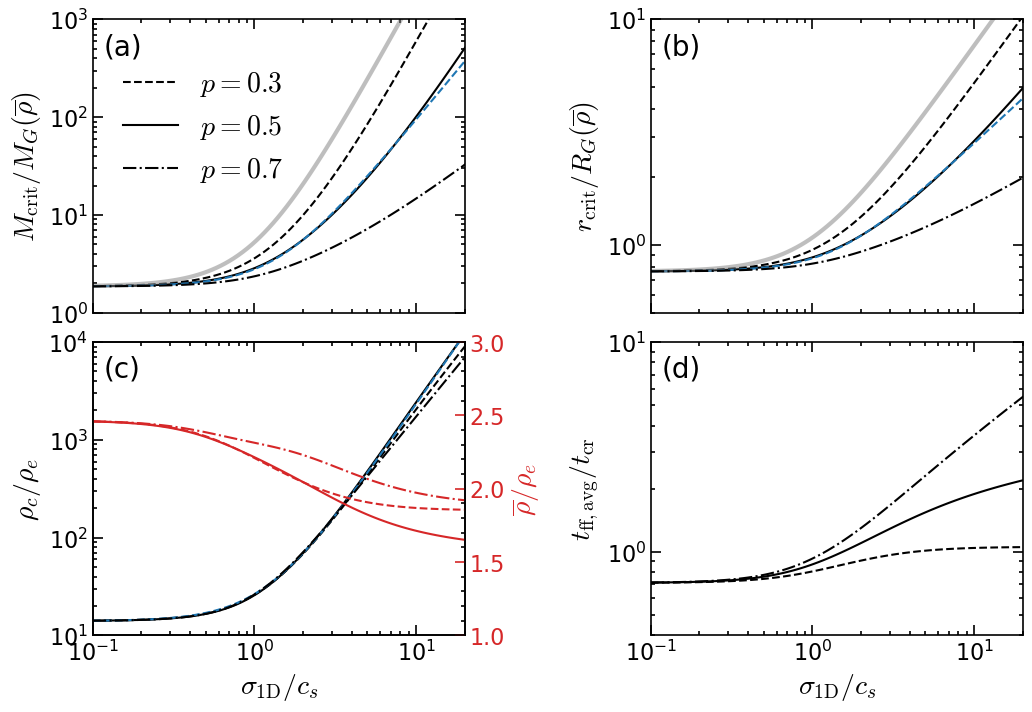

In [6]:
from scipy.interpolate import interp1d

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, gridspec_kw=dict(hspace=0.1, wspace=0.5))
ax1 = axs[1,0].twinx()

linestyles = ['--', '-', '-.']

for ls, pindex in zip(linestyles, [0.3, 0.5, 0.7]):
    with open(f"/home/sm69/tesphere/data/tse.p{pindex}.p", "rb") as handle:
        res = pickle.load(handle)
        rhoavg = res['mcrit'] / (4*np.pi*res['rcrit']**3/3)
        rcrit = res['rcrit'] * np.sqrt(rhoavg)
        mcrit = res['mcrit'] * np.sqrt(rhoavg)
        sigma_r = res['sigma']
        sigma_tot = np.sqrt(1 + sigma_r**2)
        chi = 1 + (res['rcrit']/res['rsonic'])**(2*pindex)
        dcrit = chi*np.exp(res['ucrit'])
        mean_to_edge = 3*res['mcrit']/(4*np.pi*res['rcrit']**3)*chi
        tcr = res['rcrit'] / sigma_tot
        
        tff_avg = np.sqrt(3*np.pi/(32*rhoavg))
        tff_tcr = tff_avg / tcr

        for ax, qty in zip(axs.flat, [mcrit, rcrit, dcrit, tff_tcr]):
            plt.sca(ax)
            plt.loglog(sigma_r, qty, ls=ls, c='k', lw=1.5, label=r'$p={}$'.format(pindex))
        ax1.plot(sigma_r, mean_to_edge, ls=ls, c='tab:red', lw=1.5)
        
        # Print the critical quantities at sigma_r = c_s
        y = interp1d(sigma_r, dcrit)
        print(f"For p={pindex}, critical contrast at Mach 1 = {y(1):.0f}, Mach 2 = {y(2):.0f}")
        y1 = interp1d(sigma_r, rcrit)
        y2 = interp1d(sigma_r, mcrit)
        print(f"For p={pindex} and Mach 1, Rcrit = {y1(1):.2f} RG, Mcrit = {y2(1):.2f} MG")
        print(f"For p={pindex} and Mach 2, Rcrit = {y1(2):.2f} RG, Mcrit = {y2(2):.2f} MG")
        
        if pindex==0.5:
            tol = 0.05
            
            # Mass
            mbe = 1.86
            mcrit_analytic = mbe*(1 + 0.5*sigma_r**2)
            mbe_turb = mbe*(1 + sigma_r**2)**(3/2)
            axs[0,0].plot(sigma_r, mcrit_analytic, ls='--', c='tab:blue', lw=1.5)
            axs[0,0].plot(sigma_r, mbe_turb, c='tab:gray', alpha=0.5, lw=3)
            residual = np.abs((mcrit - mcrit_analytic)/mcrit)
            xr = sigma_r[residual > tol].min()
            print(brentq(lambda x: interp1d(sigma_r, residual)(x) - tol, sigma_r[0], xr))

            # Radius
            rbe = 0.762
            rcrit_analytic =rbe*(1 + 0.5*sigma_r**2)**(1/3)
            rbe_turb = rbe*(1 + sigma_r**2)**(1/2)
            axs[0,1].plot(sigma_r, rcrit_analytic, ls='--', c='tab:blue', lw=1.5)
            axs[0,1].plot(sigma_r, rbe_turb, c='tab:gray', alpha=0.5, lw=3)
            residual = np.abs((rcrit - rcrit_analytic)/rcrit)
            xr = sigma_r[residual > tol].min()
            print(brentq(lambda x: interp1d(sigma_r, residual)(x) - tol, sigma_r[0], xr))

            # Density contrast
            dbe = 14
            dcrit_analytic = dbe*(1 + 0.7*sigma_r**2)**(1.2)
            axs[1,0].plot(sigma_r, dcrit_analytic, ls='--', c='tab:blue', lw=1.5)
            residual = np.abs((dcrit - dcrit_analytic)/dcrit)
            xr = sigma_r[residual > tol].min()
            print(brentq(lambda x: interp1d(sigma_r, residual)(x) - tol, sigma_r[0], xr))

plt.sca(axs[0,0])
plt.ylim(1e0, 1e3)
plt.ylabel(r'$M_\mathrm{crit}/M_G(\overline{\rho})$')
plt.legend(loc=(0.05, 0.4))

plt.sca(axs[0,1])
plt.ylim(5e-1, 1e1)
plt.ylabel(r'$r_\mathrm{crit}/R_G(\overline{\rho})$')


plt.sca(axs[1,0])
plt.ylim(1e1, 1e4)
plt.xlabel(r'$\sigma_\mathrm{1D}/c_s$')
plt.ylabel(r'$\rho_c/\rho_e$')

plt.sca(ax1)
plt.ylim(1, 3)
plt.ylabel(r'$\overline{\rho}/\rho_e$', color='tab:red')
plt.tick_params(axis='y', colors='tab:red')

plt.sca(axs[1,1])
plt.xlim(1e-1, 2e1)
plt.ylim(4e-1, 1e1)
plt.xlabel(r'$\sigma_\mathrm{1D}/c_s$')
plt.ylabel(r'$t_\mathrm{ff,avg}/t_\mathrm{cr}$')

for ax, txt in zip(axs.flat, ['(a)', '(b)', '(c)', '(d)']):
    ax.text(0.03, 0.88, txt, transform=ax.transAxes)

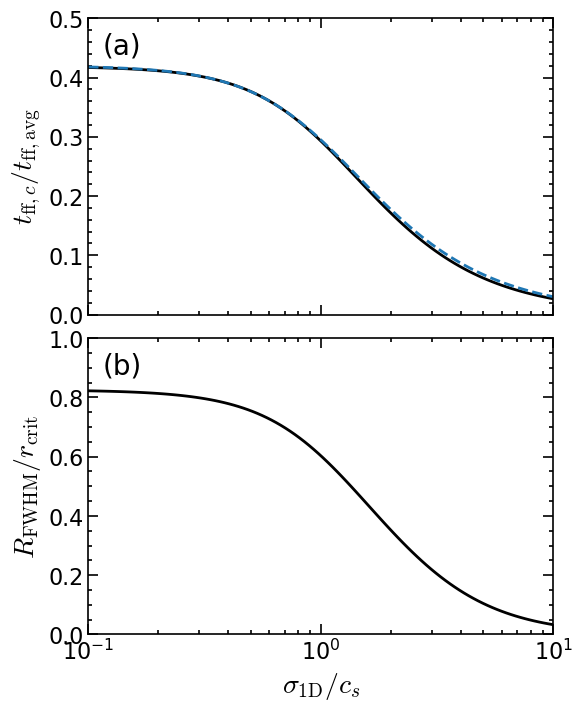

In [7]:
with open(f"/home/sm69/tesphere/data/tsc.p0.5.p", "rb") as handle:
    res = pickle.load(handle)
    rhoavg = res['mcrit'] / (res['rcrit']**3 / 3)
    sigma = res['sigma']
    tff_rat = np.sqrt(rhoavg)
    fwhm = res['rfwhm']
    rcrit = res['rcrit']

fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True, gridspec_kw=dict(hspace=0.08))

plt.sca(axs[0])
plt.plot(sigma, tff_rat, c='k')
plt.ylabel(r'$t_{\mathrm{ff},c} / t_\mathrm{ff,avg}$')
plt.ylim(0, 0.5)

plt.plot(sigma, 0.42*(1 + 0.8*sigma**2)**(-0.6), '--')

plt.sca(axs[1])
plt.plot(sigma, fwhm/rcrit, c='k')
plt.xscale('log')
plt.xlim(1e-1, 1e1)
plt.ylim(0, 1)
plt.xlabel(r'$\sigma_\mathrm{1D}/c_s$')
plt.ylabel(r'$R_\mathrm{FWHM}/r_\mathrm{crit}$')

for ax, txt in zip(axs, ['(a)', '(b)']):
    ax.text(0.03, 0.88, txt, transform=ax.transAxes)

Text(0, 0.5, '$\\Sigma/\\Sigma_c$')

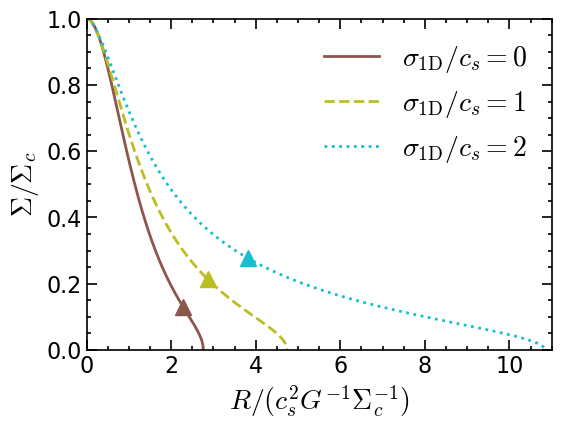

In [8]:
from tesphere import tes, utils

pindex = 0.5
for sigma, ls, c in zip([0, 1, 2], ['-', '--', ':'], ['tab:brown', 'tab:olive', 'tab:cyan']):
    rs = tes.TES.find_sonic_radius(pindex, sigma)
    ts = tes.TES(pindex=pindex, rsonic=rs)
    rcyl = np.linspace(0, ts.rcrit, 512)
    robs = utils.fwhm(ts.density, ts.rcrit)
    dcol = utils.integrate_los(ts.density, rcyl, ts.rcrit)
    R0 = 4*np.pi/dcol[0]
    plt.plot(rcyl/R0, dcol/dcol[0], c=c, label=r"$\sigma_\mathrm{1D}/c_s = $"+f"${sigma}$", ls=ls)
    dcol_fwhm = utils.integrate_los(ts.density, robs, ts.rcrit)
    plt.plot(robs/R0, dcol_fwhm/dcol[0], marker=MarkerStyle('^', fillstyle='full'), c=c, ms=12)

plt.legend()
plt.xlim(0, 11)
plt.ylim(0, 1)
plt.xlabel(r'$R/(c_s^2G^{-1}\Sigma_c^{-1})$')
plt.ylabel(r'$\Sigma/\Sigma_c$')